SNR=10dB


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
c:\Users\Nolan\Documents\GitHub\sc-adaptive-beamforming\simulation_v3\uplink_v2.py:262: ComplexWarning: Casting complex values to real discards the imaginary part
  d_tilde[i] = int((np.array(d_hat[i])+1)/2)
100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


SNR=10dB


100%|██████████| 1/1 [00:01<00:00,  1.29s/it]
c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

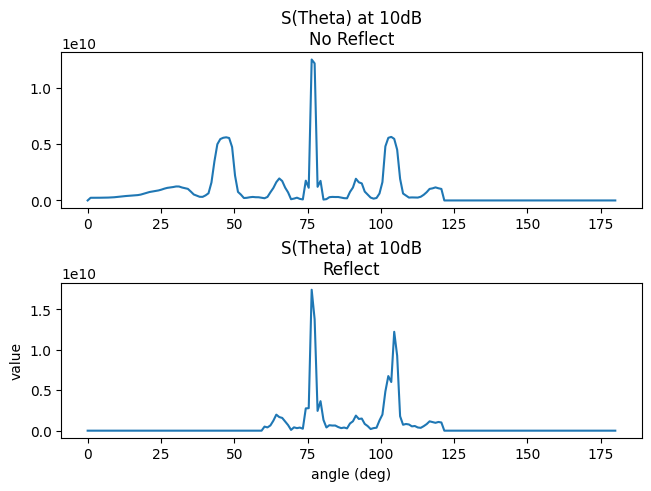

2032
48000
SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


SNR=10dB


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


SNR=10dB


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


SNR=10dB


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


SNR=10dB


100%|██████████| 1/1 [00:01<00:00,  1.30s/it]
C:\Users\Nolan\AppData\Local\Temp\ipykernel_18904\784949900.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  h[:,i] = y_adj / h_x


<Figure size 640x480 with 0 Axes>

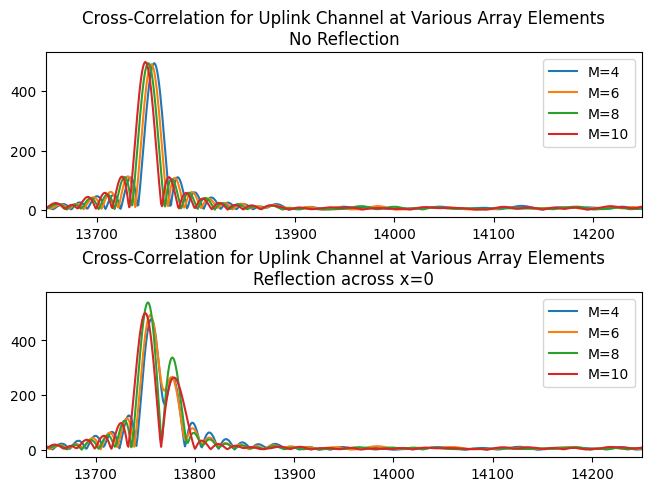

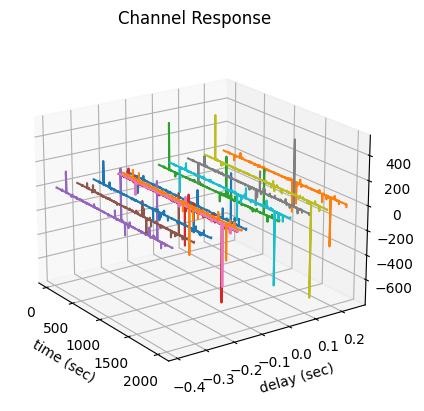

<Figure size 640x480 with 0 Axes>

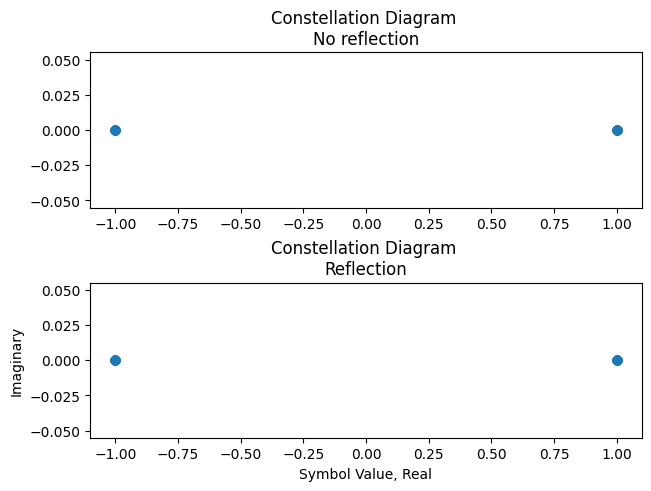

'\nfig,ax = plt.subplots()\nax.scatter(np.real(symbolset_no_bf_2), np.imag(symbolset_no_bf_2), c=\'r\', marker=\'x\')\nax.scatter(np.real(symbolset_bf_2), np.imag(symbolset_bf_2), c=\'g\', marker=\'x\')\nax.scatter(np.real(true_sym), np.imag(true_sym), c=\'b\',marker=\'o\')\nax.legend([\'RX DL, no BF\', \'RX DL, BF\',\'16QAM Constellation Points\'])\nax.set_ylim(-4, 4)\nax.set_xlim(-4,4)\nax.set_title("Constellation Diagram for SNR=15dB")\nplt.show()\n'

In [1]:
from uplink_v2 import uplink
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from downlink_v2 import downlink

fc = 15e3
# Design with one tx (AWGN LOS), then with tx + reflect
uplink_1 = uplink(fc, 1, 1)
uplink_1.reflection_list = np.array([1])
uplink_1.x_tx_list = np.array([5])
uplink_1.y_tx_list = np.array([20])

uplink_2 = uplink(fc, 2, 1) #still unclear on that second variable
uplink_2.reflection_list = np.array([1,0.5])
uplink_2.x_tx_list = np.array([5,-5])
uplink_2.y_tx_list = np.array([20,20])

theta_bf_1, wk_1, S_theta_1 = uplink_1.simulation()
theta_bf_2, wk_2, S_theta_2 = uplink_2.simulation()

# S_theta Plots
no_ind = np.arange(60)
#S_theta_1[no_ind] = 0
S_theta_1[-no_ind] = 0
S_theta_2[no_ind] = 0
S_theta_2[-no_ind] = 0

plt.figure(1)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(np.linspace(180,0,len(S_theta_1)), np.flip(S_theta_1))
plt.xlabel('angle (deg)')
plt.ylabel('value')
ax1.set_title('S(Theta) at 10dB\nNo Reflect')
ax2.plot(np.linspace(180,0, len(S_theta_2)), np.flip(S_theta_2))
ax2.set_title('S(Theta) at 10dB\nReflect')
plt.show()

m_idx = 4+2*np.arange(4)
plt.figure(2)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
for i in range(len(m_idx)):
    uplink_1.m_idx = m_idx[i]
    uplink_1.simulation()
    xcor1 = np.abs(signal.fftconvolve(uplink_1.mean_v, signal.resample_poly(uplink_1.preamble[::-1].conj(),uplink_1.nsps,1), mode='full'))
    uplink_2.m_idx = m_idx[i]
    uplink_2.simulation()
    xcor2 = np.abs(signal.fftconvolve(uplink_2.mean_v, signal.resample_poly(uplink_2.preamble[::-1].conj(),uplink_2.nsps,1), mode='full'))
    ax1.plot(xcor1, linestyle='solid', label='M=%s'%m_idx[i]) #[0:2000])
    ax1.legend()
    ax2.plot(xcor2, linestyle='solid', label='M=%s'%m_idx[i]) #[0:2000])
    ax2.legend()
ax1.set_xlim([np.argmax(xcor1) - 100, np.argmax(xcor1) + 500])
ax2.set_xlim([np.argmax(xcor2) - 100, np.argmax(xcor2) + 500])
ax1.set_title('Cross-Correlation for Uplink Channel at Various Array Elements\nNo Reflection')
ax2.set_title('Cross-Correlation for Uplink Channel at Various Array Elements\nReflection across x=0')

# Plot Channel Response
# assume response is in 3-dim 'h' (time x delay x amplitude)
h_x = signal.resample_poly(uplink_2.preamble[::-1].conj(),uplink_2.nsps,1)
h_y = uplink_2.mean_v
#hdelay = np.arange(2*len(h_x))-len(h_x)
hdelay = 20*2*np.arange(12) - 240
center_s = 13750
h = np.zeros((len(h_x),len(hdelay)))
for i in range(len(hdelay)):
    y_adj = h_y[center_s+hdelay[i]:center_s+hdelay[i]+len(h_x)]
    h[:,i] = y_adj / h_x
plt.figure(3)
ax3d = plt.figure().add_subplot(projection='3d')
for i in range(len(h[0,:])):
    ax3d.plot(np.arange(len(h[:,i])), h[:,i], zs=h[0,i], zdir='y')
ax3d.view_init(elev=20., azim=-35)
plt.xlabel('time (sec)')
plt.ylabel('delay (sec)')
plt.title('Channel Response')
plt.show()

# Plot Constellation
# For downlink?
plt.figure(4)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.scatter(np.real(uplink_1.preamble),np.imag(uplink_1.preamble))
plt.xlabel('Symbol Value, Real')
plt.ylabel('Imaginary')
ax1.set_title('Constellation Diagram \nNo reflection')
ax2.scatter(np.real(uplink_2.preamble),np.imag(uplink_2.preamble))
ax2.set_title('Constellation Diagram \nReflection')
plt.show()



"""
# run this 4 times -> no bf, no reflect; no bf, reflect; bf, no reflect; bf, reflect;
downlink_nobf_1 = downlink(fc, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=False)
downlink_nobf_1.reflection_list = np.array([1])
downlink_nobf_1.x_rx_list = np.array([5])
downlink_nobf_1.y_rx_list = np.array([20])
downlink_nobf_1.simulation()
mse_no_bf_1 = downlink_nobf_1.mean_mse
symbolset_no_bf_1 = downlink_nobf_1.mean_symbols[-1,:]
v_no_bf_1 = downlink_nobf_1.mean_v

downlink_nobf_2 = downlink(fc, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=False) #should you change the 2nd variable?
downlink_nobf_2.reflection_list = np.array([1,0.5])
downlink_nobf_2.x_rx_list = np.array([5,-5])
downlink_nobf_2.y_rx_list = np.array([20,20])
downlink_nobf_2.simulation()
mse_no_bf_2 = downlink_nobf_2.mean_mse
symbolset_no_bf_2 = downlink_nobf_2.mean_symbols[-1,:]
v_no_bf_2 = downlink_nobf_2.mean_v

downlink_bf_1 = downlink(fc, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=True)
downlink_bf_1.reflection_list = np.array([1])
downlink_bf_1.x_rx_list = np.array([5])
downlink_bf_1.y_rx_list = np.array([20])
downlink_bf_1.simulation()
mse_bf_1 = downlink_bf_1.mean_mse
symbolset_bf_1 = downlink_bf_1.mean_symbols[-1,:]
v_bf_1 = downlink_bf_1.mean_v

downlink_bf_2 = downlink(fc, 1, 1, theta=theta_bf_2, wk=wk_2, apply_bf=True)
downlink_bf_2.reflection_list = np.array([1,0.5])
downlink_bf_2.x_rx_list = np.array([5,-5])
downlink_bf_2.y_rx_list = np.array([20,20])
downlink_bf_2.simulation()
mse_bf_2 = downlink_bf_2.mean_mse
symbolset_bf_2 = downlink_bf_2.mean_symbols[-1,:]
v_bf_2 = downlink_bf_2.mean_v

# equalizer taps
true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))

# SNR/MSE Plots

plt.figure(2)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(downlink_nobf_1.snr_list, mse_no_bf_1, 'x')
ax1.plot(downlink_bf_1.snr_list, mse_bf_1, 'o')
plt.legend (['No BF', 'BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
ax1.set_title('MSE for Downlink Beamformer, No Reflect')
ax2.plot(downlink_nobf_2.snr_list, mse_no_bf_2, 'x')
ax2.plot(downlink_bf_2.snr_list, mse_bf_2, 'o')
ax2.set_title('MSE for Downlink Beamformer, Reflect')
plt.show


# xcorr graphs

plt.figure(4)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
xcor = np.abs(signal.fftconvolve(downlink_nobf_1.mean_v, signal.resample_poly(downlink_nobf_1.preamble[::-1].conj(),downlink_nobf_1.nsps,1)))
ax1.plot(xcor) #[0:2000])
ax1.set_xlim([np.argmax(xcor) - 100, np.argmax(xcor) + 500])
xcor = np.abs(signal.fftconvolve(downlink_nobf_2.mean_v, signal.resample_poly(downlink_nobf_2.preamble[::-1].conj(),downlink_nobf_2.nsps,1)))
ax2.set_xlim([np.argmax(xcor) - 100, np.argmax(xcor) + 500])
ax2.plot(xcor) #[0:2000])
ax1.set_title('XCorr for no BF, No Reflect')
ax2.set_title('XCorr for no BF, Reflect')

plt.figure(5)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
xcor = np.abs(signal.fftconvolve(downlink_bf_1.mean_v,signal.resample_poly(downlink_bf_1.preamble[::-1].conj(),downlink_bf_1.nsps,1)))
ax1.plot(xcor) #[0:2000])
xcor = np.abs(signal.fftconvolve(downlink_bf_2.mean_v,signal.resample_poly(downlink_bf_2.preamble[::-1].conj(),downlink_bf_2.nsps,1)))
ax1.set_xlim([np.argmax(xcor) - 100, np.argmax(xcor) + 500])
ax2.plot(xcor) #[0:2000])
ax2.set_xlim([np.argmax(xcor) - 100, np.argmax(xcor) + 500])
ax1.set_title('XCorr for BF, No Reflect')
ax2.set_title('XCorr for BF, Reflect')
"""
"""
# plot element spacing for downlink and MSE for 10 dB
d_lambda = np.array([0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
d = d_lambda*343/fc
mse_bf_d = np.zeros_like(d)

for i in range(len(d)):
    d0 = d[i]
    uplink_d = uplink(fc, 2, 5) #still unclear on that second variable
    uplink_d.d0 = d0
    uplink_d.reflection_list = np.array([1,0.5])
    uplink_d.x_tx_list = np.array([5,-5])
    uplink_d.y_tx_list = np.array([20,20])
    uplink_d.simulation()
    mse_bf_d[i] = uplink_d.mean_mse


plt.figure()
plt.plot(d_lambda, mse_bf_d, 'x')
plt.xlabel('Element Spacing (Lambda)')
plt.ylabel('MSE (dB)')
plt.title(f'Element Spacing vs. MSE at 10 dB for fc={fc/1000:.1f}kHz')
plt.show()
"""

"""
fig,ax = plt.subplots()
ax.scatter(np.real(symbolset_no_bf_2), np.imag(symbolset_no_bf_2), c='r', marker='x')
ax.scatter(np.real(symbolset_bf_2), np.imag(symbolset_bf_2), c='g', marker='x')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b',marker='o')
ax.legend(['RX DL, no BF', 'RX DL, BF','16QAM Constellation Points'])
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()
"""
